<a href="https://colab.research.google.com/github/ejrtks1020/Pytorch-basic/blob/main/PyTorch_ANN_MNIST%EB%B6%84%EB%A5%98_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

소프트 맥스 회귀 : 입력층과 출력층만 존재하며 소프트맥스 함수를 활성화 함수로 사용한 '단층 퍼셉트론'이라고 할 수 있다.

#1. 데이터 로드

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import fetch_openml

In [4]:
mnist = fetch_openml('mnist_784', version = 1, cache = True)

In [11]:
mnist.data = np.array(mnist.data)

In [15]:
mnist.target = np.asarray(mnist.target).astype(np.int8)

In [17]:
X = mnist.data / 255 # 0 ~ 255값을 [0,1] 구간으로 정규화
y = mnist.target

In [18]:
X.shape

(70000, 784)

이 이미지 데이터의 레이블은 5이다.


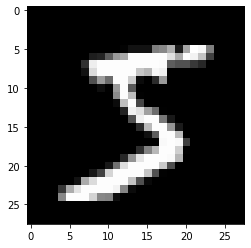

In [21]:
plt.imshow(X[0].reshape(28,28), cmap = 'gray')
print("이 이미지 데이터의 레이블은 {:.0f}이다.".format(y[0]))

#2. 훈련 데이터와 테스트 데이터의 분리

In [22]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/7, random_state = 0)

X_train = torch.Tensor(X_train)
X_test = torch.Tensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

ds_train = TensorDataset(X_train, y_train)
ds_test = TensorDataset(X_test, y_test)

loader_train = DataLoader(ds_train, batch_size = 64, shuffle = True)
loader_test = DataLoader(ds_test, batch_size = 64, shuffle = False)

#3. 다층 퍼셉트론

In [26]:
from torch import nn
model = nn.Sequential()
model.add_module('fc1', nn.Linear(28*28*1, 100))
model.add_module('relu1', nn.ReLU())
model.add_module('fc2', nn.Linear(100, 100))
model.add_module('relu2', nn.ReLU())
model.add_module('fc2', nn.Linear(100, 10))

print(model)

Sequential(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=10, bias=True)
  (relu2): ReLU()
)


In [27]:
from torch import optim

# 오차함수 선택
loss_fn = nn.CrossEntropyLoss()

# 가중치를 학습하기 위한 최적화 기법 선택
optimizer = optim.Adam(model.parameters(), lr = 0.01)


In [28]:
def train(epoch):
  model.train() # 신경망을 학습 모드로 전환

  # 데이터 로더에서 미니배치를 하나씩 꺼내 학습을 수행
  for data, label in loader_train:
    optimizer.zero_grad() # 경사를 0으로 초기화
    outputs = model(data) # 데이터를 입력하고 출력을 계산
    loss = loss_fn(outputs, label) # 출력과 훈련데이터 정답간의 오차를 계산
    loss.backward() # 오차를 역전파 계산
    optimizer.step() # 역전파 계산한 값으로 가중치를 수정

  print('epoch{}:완료\n'.format(epoch))

In [29]:
def test():
  model.eval() #신경망을 추론 모드로 전환
  correct = 0

  # 데이터로더에서 미니배치를 하니씩 꺼내 추론을 수행
  with torch.no_grad(): #추론과정에는 미분이 필요없다 -> 메모리 소모 줄임
    for data, targets in loader_test:
      outputs = model(data) #데이터를 입력하고 출력을 계산

      # 추론 계산
      _, predicted = torch.max(outputs.data, 1) # 가장 확률이 높은 데이터의 인덱스 (숫자)를 반환
      correct += predicted.eq(targets.data.view_as(predicted)).sum() #정답과 일치한 경우 카운트를 증가

  # 정확도 출력
  data_num = len(loader_test.dataset) # 데이터 총 건수
  print('\n테스트 데이터에서 예측 정확도: {}/{} ({:.0f}%)\n'.format(correct,
                                                       data_num, 100. * correct / data_num))

In [30]:
test()


테스트 데이터에서 예측 정확도: 936/10000 (9%)



In [31]:
for epoch in range(3):
  train(epoch)

test()

epoch0:완료

epoch1:완료

epoch2:완료


테스트 데이터에서 예측 정확도: 6574/10000 (66%)



In [40]:
index = 2018
model.eval() # 신경망을 추론 모드로 전환
data = X_test[index]
output = model(data) # 데이터를 입력하고 출력을 계산
_, predicted = torch.max(output.data, 0) # 확률이 가장 높은 레이블이 무엇인지 계산

In [43]:
output.data

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [46]:
data = X_test[2021]
output = model(data)
print(torch.max(output.data, 0)[1], y_test[2021])

tensor(6) tensor(6)


In [41]:
print("예측 결과 : {}".format(predicted))

예측 결과 : 0


인덱스 2018의 정답레이블은 2입니다.


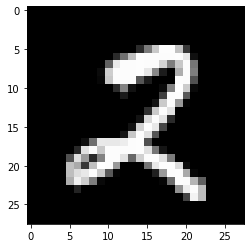

In [39]:
X_test_show = (X_test[index]).numpy()
plt.imshow(X_test_show.reshape(28 ,28), cmap = 'gray')
print('인덱스 {}의 정답레이블은 {}입니다.'.format(index, y_test[index]))